In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
shoot_df=pd.read_html(r'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')[0]
shoot_df.columns=shoot_df.columns.get_level_values(1)
shoot_df=shoot_df[shoot_df['Rk']!='Rk'].reset_index(drop=True)

In [3]:
Squad=shoot_df[['Player','Squad']]

In [4]:
pass_df=pd.read_html(r'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats')[0]
pass_df.columns = ['_'.join(filter(None, col)).strip() for col in pass_df.columns]
pass_df=pass_df.rename(columns={'Unnamed: 1_level_0_Player':'Player'})

In [5]:
pass_type_df=pd.read_html(r'https://fbref.com/en/comps/Big5/passing_types/players/Big-5-European-Leagues-Stats')[0]
pass_type_df.columns=pass_type_df.columns.get_level_values(1)
pass_type_df=pass_type_df[pass_type_df['Rk']!='Rk'].reset_index(drop=True)

In [6]:
sca_df=pd.read_html(r'https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats')[0]
sca_df.columns=sca_df.columns.get_level_values(1)
sca_df=sca_df[sca_df.Rk!='Rk'].reset_index(drop=True)

In [7]:
def_df=pd.read_html(r'https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats')[0]
def_df.columns = ['_'.join(filter(None, col)).strip() for col in def_df.columns]
def_df=def_df[def_df['Unnamed: 0_level_0_Rk']!='Rk'].reset_index(drop=True)
def_df=def_df.rename(columns={'Unnamed: 1_level_0_Player':'Player'})

In [8]:
poss_df=pd.read_html(r'https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats')[0]
poss_df.columns=poss_df.columns.get_level_values(1)
poss_df=poss_df[poss_df.Rk!='Rk'].reset_index(drop=True)

In [9]:
misc_df=pd.read_html(r'https://fbref.com/en/comps/Big5/misc/players/Big-5-European-Leagues-Stats')[0]
misc_df.columns=misc_df.columns.get_level_values(1)
misc_df=misc_df[misc_df.Rk!='Rk'].reset_index(drop=True)

In [10]:
#shoot_df,pass_df,pass_type_df,sca_df,def_df,poss_df,misc_df

In [11]:
pass_df.columns
pass_df_final=pass_df[['Player','Total_PrgDist']]
pass_df_final=pass_df_final.rename(columns={'Total_PrgDist':'Pass_distance'})

In [12]:
poss_df.columns
poss_df_final=poss_df[['Player', 'Pos','90s','TotDist','PrgDist']]
poss_df_final=poss_df_final.rename(columns={'PrgDist':'Poss_distance'})

In [13]:
def_df.columns
def_df_final=def_df[['Player','Tackles_Def 3rd','Blocks_Blocks','Unnamed: 22_level_0_Tkl+Int']]
def_df_final=def_df_final.rename(columns={'Unnamed: 22_level_0_Tkl+Int':'Tkl+Int'})

In [14]:
CDM_df=pd.merge(poss_df_final,pass_df_final,on='Player')
CDM_df=pd.merge(CDM_df,def_df_final,on='Player').reset_index(drop=True)

In [15]:
CDM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Player           2586 non-null   object
 1   Pos              2586 non-null   object
 2   90s              2586 non-null   object
 3   TotDist          2586 non-null   object
 4   Poss_distance    2586 non-null   object
 5   Pass_distance    2586 non-null   object
 6   Tackles_Def 3rd  2586 non-null   object
 7   Blocks_Blocks    2586 non-null   object
 8   Tkl+Int          2586 non-null   object
dtypes: object(9)
memory usage: 182.0+ KB


In [16]:
# Specify the columns to exclude
columns_to_exclude = ['Player', 'Pos']

# Identify columns to convert (exclude 'Player' and 'Pos')
columns_to_convert = [col for col in CDM_df.columns if col not in columns_to_exclude]

# Convert the selected columns to numeric, coercing errors and replacing NaNs with 0
for col in columns_to_convert:
    CDM_df[col] = pd.to_numeric(CDM_df[col], errors='coerce').fillna(0).astype(int)

# Display the updated DataFrame info
print(CDM_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Player           2586 non-null   object
 1   Pos              2586 non-null   object
 2   90s              2586 non-null   int64 
 3   TotDist          2586 non-null   int64 
 4   Poss_distance    2586 non-null   int64 
 5   Pass_distance    2586 non-null   int64 
 6   Tackles_Def 3rd  2586 non-null   int64 
 7   Blocks_Blocks    2586 non-null   int64 
 8   Tkl+Int          2586 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 182.0+ KB
None


In [17]:
CDM_df_final=CDM_df[(CDM_df['90s']>8)&(~CDM_df['Pos'].isin(['DF','GK']))]

In [18]:
CDM_df_final['Progressive dist carried per match']=CDM_df_final['Poss_distance']/CDM_df_final['90s']
CDM_df_final['Progressive dist pass per match']=CDM_df_final['Pass_distance']/CDM_df_final['90s']
CDM_df_final['Tkl+Int per match']=CDM_df_final['Tkl+Int']/CDM_df_final['90s']


/var/folders/w1/v_96k9nn4k73369wp7ddnydw0000gn/T/ipykernel_34966/2953310263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CDM_df_final['Progressive dist carried per match']=CDM_df_final['Poss_distance']/CDM_df_final['90s']
/var/folders/w1/v_96k9nn4k73369wp7ddnydw0000gn/T/ipykernel_34966/2953310263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CDM_df_final['Progressive dist pass per match']=CDM_df_final['Pass_distance']/CDM_df_final['90s']
/var/folders/w1/v_96k9nn4k73369wp7ddnydw0000gn/T/ipykerne

In [19]:
CDM=CDM_df_final[['Player','Pos','Progressive dist carried per match', 'Progressive dist pass per match',
       'Tkl+Int per match']]

In [20]:
CDM[CDM['Player']=='Vitinha']

,Player,Pos,Progressive dist carried per match,Progressive dist pass per match,Tkl+Int per match
2459,Vitinha,MF,163.636364,22.727273,1.545455
2460,Vitinha,MF,163.636364,22.727273,2.363636
2461,Vitinha,MF,163.636364,398.636364,1.545455
2462,Vitinha,MF,163.636364,398.636364,2.363636


In [21]:
CDM=pd.merge(CDM,Squad,on='Player')
CDM.sort_values('Progressive dist pass per match',ascending=False).head(30)
CDM.shape

(571, 6)

In [22]:
CDM.columns

Index(['Player', 'Pos', 'Progressive dist carried per match',
       'Progressive dist pass per match', 'Tkl+Int per match', 'Squad'],
      dtype='object')

In [23]:
CDM = CDM.drop_duplicates(subset=['Player'], keep='first')

In [24]:
CDM[CDM['Player']=='Vitinha']

,Player,Pos,Progressive dist carried per match,Progressive dist pass per match,Tkl+Int per match,Squad
536,Vitinha,MF,163.636364,22.727273,1.545455,Genoa


In [32]:
CDM

,Player,Pos,Progressive dist carried per match,Progressive dist pass per match,Tkl+Int per match,Squad
0,Himad Abdelli,"MF,FW",144.785714,219.285714,2.500000,Angers
1,Abel,"DF,FW",67.909091,239.454545,3.090909,Osasuna
2,Matthis Abline,FW,48.750000,33.083333,0.666667,Nantes
3,Zakaria Aboukhlal,"MF,FW",47.923077,41.923077,1.384615,Toulouse
4,Akor Adams,FW,24.500000,16.100000,0.400000,Montpellier
...,...,...,...,...,...,...
566,Edon Zhegrova,"FW,MF",123.600000,146.700000,0.900000,Lille
567,Nadir Zortea,"DF,FW",70.000000,122.400000,1.900000,Cagliari
568,Martín Zubimendi,MF,86.000000,243.687500,4.125000,Real Sociedad
569,Martin Ødegaard,MF,118.000000,188.777778,1.333333,Arsenal


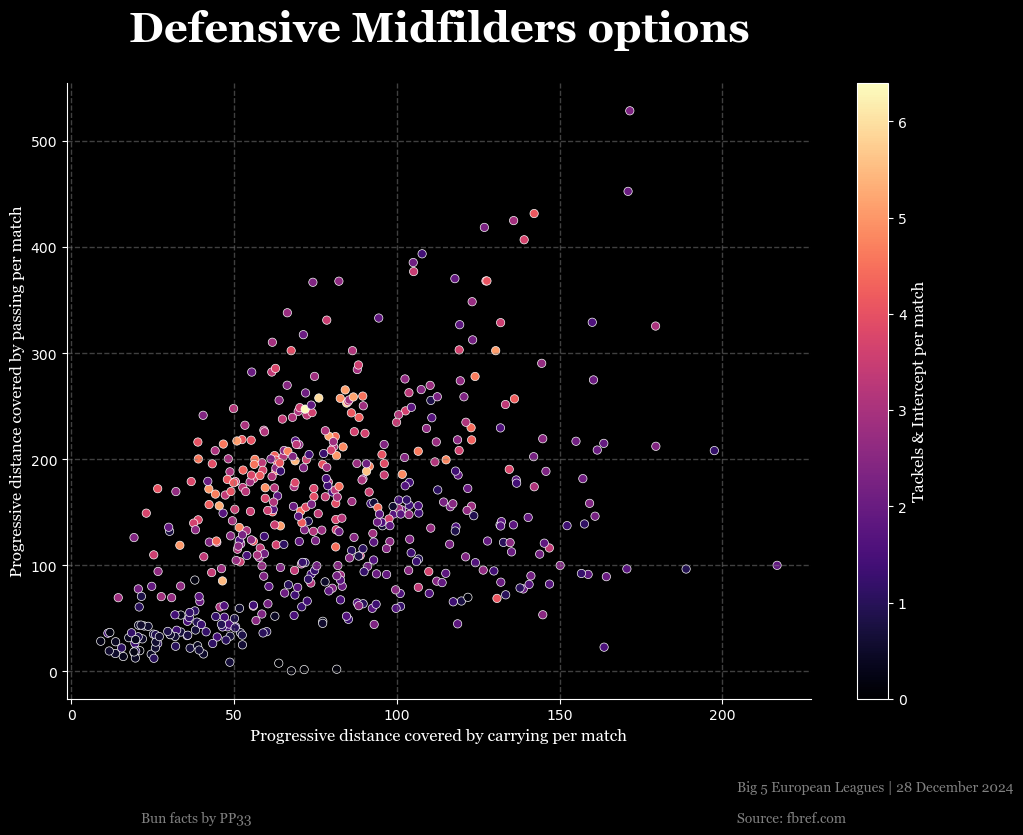

In [26]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=CDM,
    x='Progressive dist carried per match',
    y='Progressive dist pass per match',
    hue='Tkl+Int per match',
    palette='magma',
    legend=False)
plt.title('Defensive Midfilders options',weight="bold", pad=30,fontsize=30,fontname="Georgia")

# Add a color bar using Matplotlib's ScalarMappable
norm = plt.Normalize(CDM['Tkl+Int per match'].min(), CDM['Tkl+Int per match'].max())
sm = plt.cm.ScalarMappable(cmap="magma", norm=norm)
sm.set_array(CDM['Tkl+Int per match'])  # Link the data to the ScalarMappable
cbar = plt.colorbar(sm, ax=scatter.axes)  # Explicitly provide the axes
cbar.set_label('Tackels & Intercept per match',fontsize=12, color="white",fontname="Georgia")  # Add a label to the color bar
plt.xlabel('Progressive distance covered by carrying per match',fontsize=12, color="white",fontname="Georgia")
plt.ylabel('Progressive distance covered by passing per match',fontsize=12, color="white",fontname="Georgia")
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5, which='both')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
# Show the plot
today = datetime.today()
formatted_date = today.strftime("%d %B %Y")
plt.text(0.9, -0.15, f"Big 5 European Leagues | {formatted_date}", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.9, -0.2, "Source: fbref.com ", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.1, -0.2, "Bun facts by PP33", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")

plt.show()


In [34]:
CDM['Avg_value']=(CDM['Progressive dist carried per match']+CDM['Progressive dist pass per match']+CDM['Tkl+Int per match']*100)/3

In [40]:
CDM.sort_values('Avg_value',ascending=False).head(30)

,Player,Pos,Progressive dist carried per match,Progressive dist pass per match,Tkl+Int per match,Squad,Avg_value
224,Pierre Højbjerg,MF,142.142857,431.642857,4.142857,Marseille,329.357143
439,Rocco Reitz,MF,71.800000,247.200000,6.400000,Gladbach,319.666667
464,Nicolò Rovella,MF,130.333333,302.333333,5.083333,Lazio,313.666667
252,Joshua Kimmich,"MF,DF",171.533333,528.533333,2.333333,Bayern Munich,311.133333
88,Lamine Camara,MF,76.000000,257.700000,5.900000,Monaco,307.900000
507,Aurélien Tchouaméni,"MF,DF",139.076923,406.923077,3.692308,Real Madrid,305.076923
69,Tom Bischof,MF,84.545455,252.909091,5.727273,Hoffenheim,303.393939
494,Anton Stach,"DF,MF",127.642857,368.071429,4.071429,Hoffenheim,300.952381
265,Geoffrey Kondogbia,"DF,MF",127.333333,368.083333,3.750000,Marseille,290.138889
382,João Neves,MF,124.000000,278.000000,4.666667,Paris S-G,289.555556


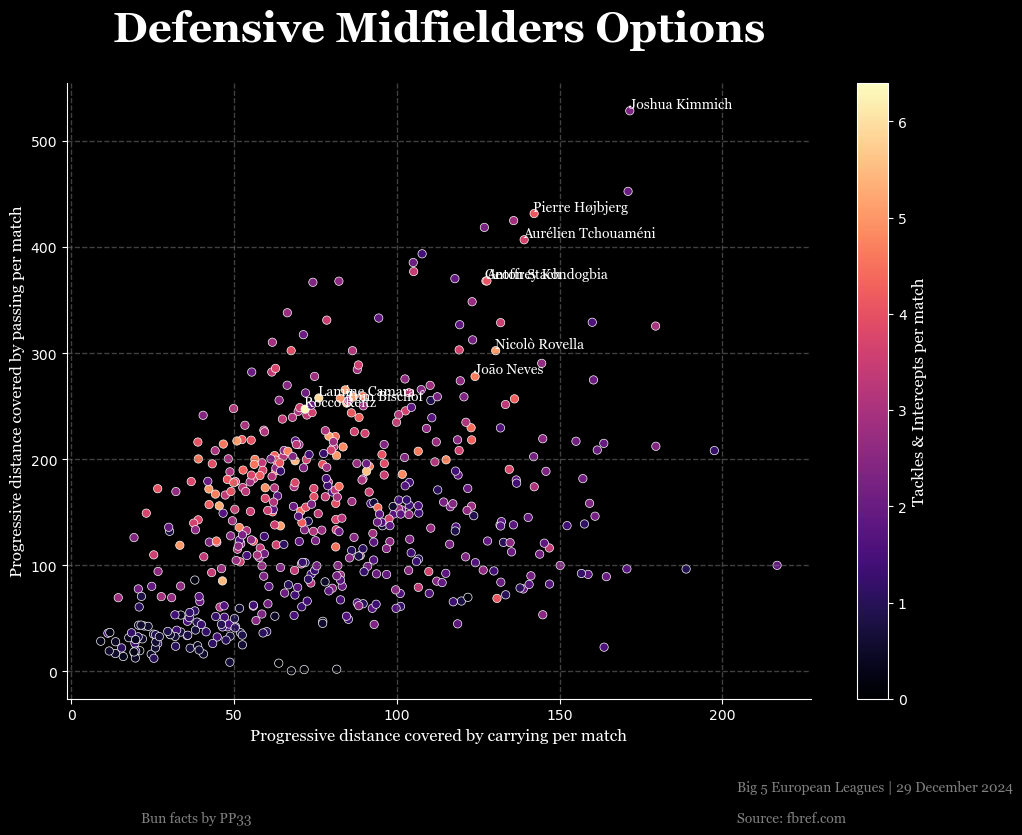

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Sort the players by Avg_value and get the top 30 players
top_10_players = CDM.sort_values('Avg_value', ascending=False).head(10)

# Plot the scatter plot
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data=CDM,  # Use the entire dataset for plotting
    x='Progressive dist carried per match',
    y='Progressive dist pass per match',
    hue='Tkl+Int per match',
    palette='magma',
    legend=False
)

# Add a color bar using Matplotlib's ScalarMappable
norm = plt.Normalize(CDM['Tkl+Int per match'].min(), CDM['Tkl+Int per match'].max())
sm = plt.cm.ScalarMappable(cmap="magma", norm=norm)
sm.set_array(CDM['Tkl+Int per match'])  # Link the data to the ScalarMappable
cbar = plt.colorbar(sm, ax=scatter.axes)  # Explicitly provide the axes
cbar.set_label('Tackles & Intercepts per match', fontsize=12, color="white", fontname="Georgia")  # Add a label to the color bar

# Add labels to the axes
plt.xlabel('Progressive distance covered by carrying per match', fontsize=12, color="white", fontname="Georgia")
plt.ylabel('Progressive distance covered by passing per match', fontsize=12, color="white", fontname="Georgia")

# Title and grid settings
plt.title('Defensive Midfielders Options', weight="bold", pad=30, fontsize=30, fontname="Georgia")
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5, which='both')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')

# Annotate only the top 10 players with their names
for i, row in top_10_players.iterrows():
    player_name = row['Player']
    
    plt.text(row['Progressive dist carried per match']-0.2, row['Progressive dist pass per match']-0.1,
             player_name, fontsize=10, color='white', ha='left', fontname="Georgia",
             verticalalignment='bottom', horizontalalignment='right')

# Show the plot with additional text for date and source
today = datetime.today()
formatted_date = today.strftime("%d %B %Y")
plt.text(0.9, -0.15, f"Big 5 European Leagues | {formatted_date}", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.9, -0.2, "Source: fbref.com ", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.1, -0.2, "Bun facts by PP33", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")


# Show the plot
plt.show()


In [68]:
top_10_players

,Player,Pos,Progressive dist carried per match,Progressive dist pass per match,Tkl+Int per match,Squad,Avg_value
224,Pierre Højbjerg,MF,142.142857,431.642857,4.142857,Marseille,329.357143
439,Rocco Reitz,MF,71.800000,247.200000,6.400000,Gladbach,319.666667
464,Nicolò Rovella,MF,130.333333,302.333333,5.083333,Lazio,313.666667
252,Joshua Kimmich,"MF,DF",171.533333,528.533333,2.333333,Bayern Munich,311.133333
88,Lamine Camara,MF,76.000000,257.700000,5.900000,Monaco,307.900000
507,Aurélien Tchouaméni,"MF,DF",139.076923,406.923077,3.692308,Real Madrid,305.076923
69,Tom Bischof,MF,84.545455,252.909091,5.727273,Hoffenheim,303.393939
494,Anton Stach,"DF,MF",127.642857,368.071429,4.071429,Hoffenheim,300.952381
265,Geoffrey Kondogbia,"DF,MF",127.333333,368.083333,3.750000,Marseille,290.138889
382,João Neves,MF,124.000000,278.000000,4.666667,Paris S-G,289.555556


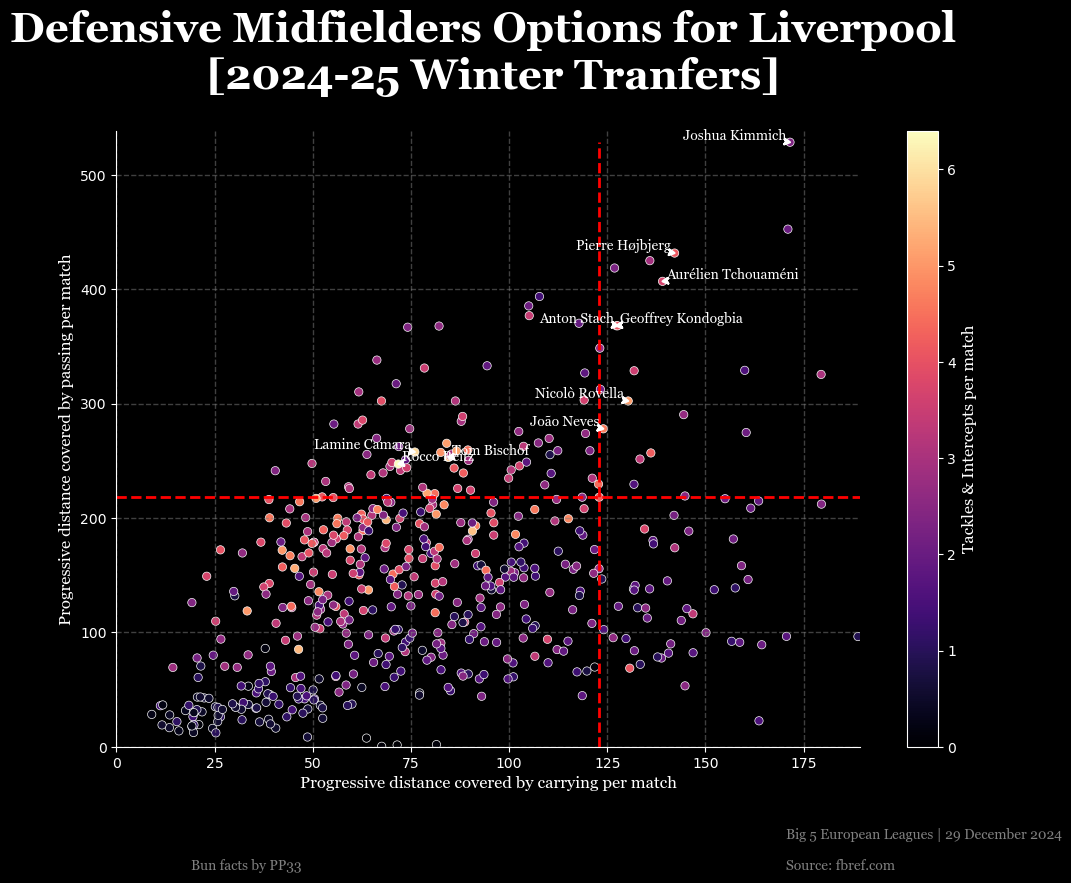

In [154]:
# Sort the players by Avg_value and get the top 10 players
top_10_players = CDM.sort_values('Avg_value', ascending=False).head(10)

# Plot the scatter plot
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data=CDM,  # Use the entire dataset for plotting
    x='Progressive dist carried per match',
    y='Progressive dist pass per match',
    hue='Tkl+Int per match',
    palette='magma',
    legend=False
)

# Add a color bar using Matplotlib's ScalarMappable
norm = plt.Normalize(CDM['Tkl+Int per match'].min(), CDM['Tkl+Int per match'].max())
sm = plt.cm.ScalarMappable(cmap="magma", norm=norm)
sm.set_array(CDM['Tkl+Int per match'])  # Link the data to the ScalarMappable
cbar = plt.colorbar(sm, ax=scatter.axes)  # Explicitly provide the axes
cbar.set_label('Tackles & Intercepts per match', fontsize=12, color="white", fontname="Georgia")  # Add a label to the color bar

# Add labels to the axes
plt.xlabel('Progressive distance covered by carrying per match', fontsize=12, color="white", fontname="Georgia")
plt.ylabel('Progressive distance covered by passing per match', fontsize=12, color="white", fontname="Georgia")

# Title and grid settings
plt.title('Defensive Midfielders Options for Liverpool \n [2024-25 Winter Tranfers]', weight="bold", pad=30, fontsize=30, fontname="Georgia")

plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5, which='both')

plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')

plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')

plt.xlim(0, top_30_players['Progressive dist carried per match'].max() + 10)  # Set x-axis to start from 0
plt.ylim(0, top_30_players['Progressive dist pass per match'].max() + 10)  # Set y-axis to start from 0

plt.xlim(left=0)
plt.ylim(bottom=0)
# Annotate only the top 10 players with arrows and their names
for i, row in top_10_players.iterrows():
    player_name = row['Player']
    x = row['Progressive dist carried per match']
    y = row['Progressive dist pass per match']
    
    # Adjust annotation position based on whether index is even or odd
    if i % 2 == 0:
        # Even index: place on the left side
        xytext = (x - 1, y)
        ha = 'right'
        arrowstyle = "fancy"
    else:
        # Odd index: place on the right side
        xytext = (x + 1, y)
        ha = 'left'
        arrowstyle = "fancy"
    
    # Add an arrow pointing to the player's position with a curve
    plt.annotate(
        player_name,  # Text to display
        xy=(x, y),  # Position of the player
        xytext=xytext,  # Position for the text (depending on even or odd index)
        fontsize=10,
        color='white',
        ha=ha,
        arrowprops=dict(
            arrowstyle=arrowstyle,  # Curved arrow style
            color='white',  # Arrow color
            lw=1.5  # Line width of the arrow
        ),
        fontname="Georgia",
        verticalalignment='bottom',
        horizontalalignment=ha
    )

# Show the plot with additional text for date and source
today = datetime.today()
formatted_date = today.strftime("%d %B %Y")
plt.text(0.9, -0.15, f"Big 5 European Leagues | {formatted_date}", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.9, -0.2, "Source: fbref.com ", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.1, -0.2, "Bun facts by PP33", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.savefig(r"/Users/preciousprince/Downloads/bf_pp33.png", dpi=300, bbox_inches='tight')
y_value_Ryan = CDM[CDM['Player'] == 'Ryan Gravenberch']['Progressive dist pass per match'].values[0]
x_value_Ryan= CDM[CDM['Player'] == 'Ryan Gravenberch']['Progressive dist carried per match'].values[0]
# Plot the horizontal line
plt.hlines(y=y_value_Ryan, xmin=0, xmax=CDM['Progressive dist carried per match'].max(),linestyle='--', color='red', linewidth=2)# Show the plot
plt.vlines(x=x_value_Ryan, ymin=0, ymax=CDM['Progressive dist pass per match'].max(),linestyle='--', color='red', linewidth=2)
plt.savefig(r"/Users/preciousprince/Downloads/bf_pp33.png", dpi=300, bbox_inches='tight')
plt.show()


In [162]:
top_10_players=top_10_players.reset_index(drop=True)
top_10_players

,Player,Pos,Progressive dist carried per match,Progressive dist pass per match,Tkl+Int per match,Squad,Avg_value
0,Pierre Højbjerg,MF,142.142857,431.642857,4.142857,Marseille,329.357143
1,Rocco Reitz,MF,71.800000,247.200000,6.400000,Gladbach,319.666667
2,Nicolò Rovella,MF,130.333333,302.333333,5.083333,Lazio,313.666667
3,Joshua Kimmich,"MF,DF",171.533333,528.533333,2.333333,Bayern Munich,311.133333
4,Lamine Camara,MF,76.000000,257.700000,5.900000,Monaco,307.900000
5,Aurélien Tchouaméni,"MF,DF",139.076923,406.923077,3.692308,Real Madrid,305.076923
6,Tom Bischof,MF,84.545455,252.909091,5.727273,Hoffenheim,303.393939
7,Anton Stach,"DF,MF",127.642857,368.071429,4.071429,Hoffenheim,300.952381
8,Geoffrey Kondogbia,"DF,MF",127.333333,368.083333,3.750000,Marseille,290.138889
9,João Neves,MF,124.000000,278.000000,4.666667,Paris S-G,289.555556


In [110]:
top_30_players = CDM.sort_values('Avg_value', ascending=False).head(30).reset_index(drop=True)
top_30_players

,Player,Pos,Progressive dist carried per match,Progressive dist pass per match,Tkl+Int per match,Squad,Avg_value
0,Pierre Højbjerg,MF,142.142857,431.642857,4.142857,Marseille,329.357143
1,Rocco Reitz,MF,71.800000,247.200000,6.400000,Gladbach,319.666667
2,Nicolò Rovella,MF,130.333333,302.333333,5.083333,Lazio,313.666667
3,Joshua Kimmich,"MF,DF",171.533333,528.533333,2.333333,Bayern Munich,311.133333
4,Lamine Camara,MF,76.000000,257.700000,5.900000,Monaco,307.900000
5,Aurélien Tchouaméni,"MF,DF",139.076923,406.923077,3.692308,Real Madrid,305.076923
6,Tom Bischof,MF,84.545455,252.909091,5.727273,Hoffenheim,303.393939
7,Anton Stach,"DF,MF",127.642857,368.071429,4.071429,Hoffenheim,300.952381
8,Geoffrey Kondogbia,"DF,MF",127.333333,368.083333,3.750000,Marseille,290.138889
9,João Neves,MF,124.000000,278.000000,4.666667,Paris S-G,289.555556


In [130]:
liv_current_best_players=CDM[CDM['Squad']=='Liverpool'].sort_values('Avg_value',ascending=False).reset_index(drop=True)
liv_carried=liv_current_best_players.iloc[0]['Progressive dist carried per match']
liv_pass=liv_current_best_players.iloc[0]['Progressive dist pass per match']
liv_tkl_int=liv_current_best_players.iloc[0]['Tkl+Int per match']



In [144]:
better_player_than_current_liv_mid = top_30_players[
    (top_30_players['Progressive dist carried per match'] > liv_carried) &
    (top_30_players['Progressive dist pass per match'] > liv_pass) &
    (top_30_players['Tkl+Int per match'] > liv_tkl_int)
].reset_index(drop=True)


In [146]:
better_player_than_current_liv_mid

,Player,Pos,Progressive dist carried per match,Progressive dist pass per match,Tkl+Int per match,Squad,Avg_value
0,Nicolò Rovella,MF,130.333333,302.333333,5.083333,Lazio,313.666667
1,João Neves,MF,124.000000,278.000000,4.666667,Paris S-G,289.555556


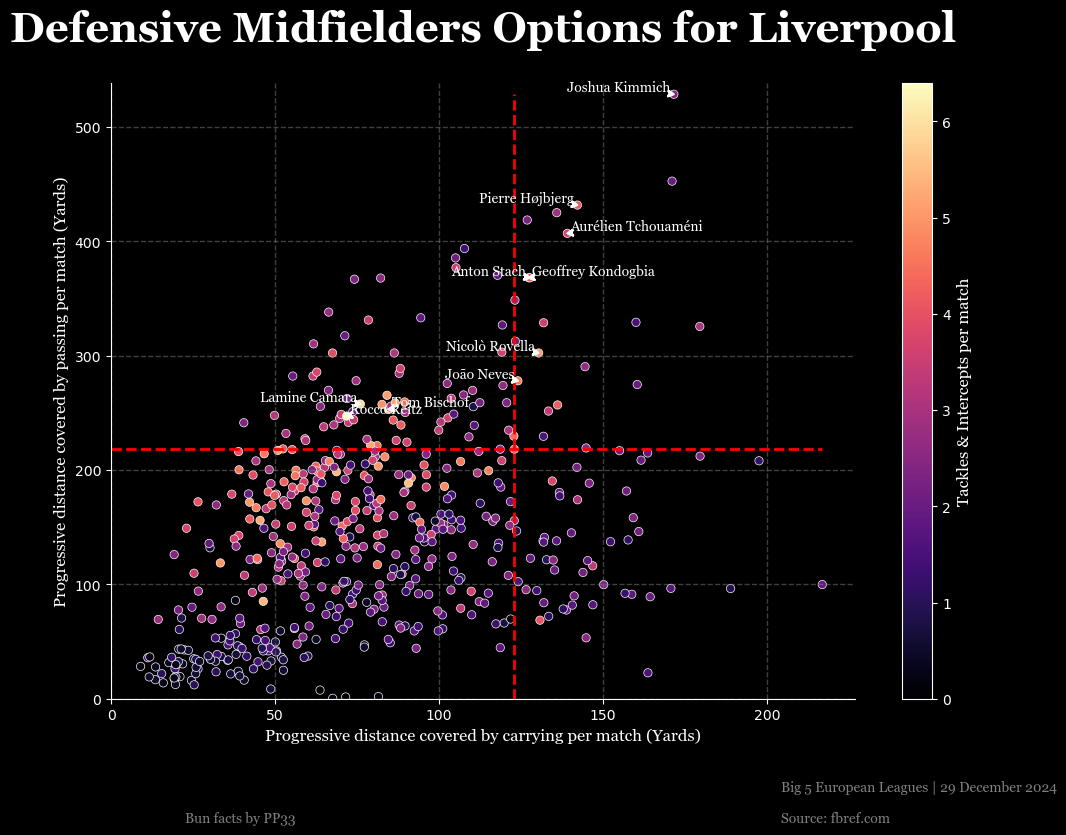

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Sort the players by Avg_value and get the top 10 players
top_10_players = CDM.sort_values('Avg_value', ascending=False).head(10)

# Plot the scatter plot
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

# Scatter plot using the full dataset
scatter = sns.scatterplot(
    data=CDM,  # Use the entire dataset for plotting
    x='Progressive dist carried per match',
    y='Progressive dist pass per match',
    hue='Tkl+Int per match',
    palette='magma',
    legend=False
)

# Add a color bar using Matplotlib's ScalarMappable
norm = plt.Normalize(CDM['Tkl+Int per match'].min(), CDM['Tkl+Int per match'].max())
sm = plt.cm.ScalarMappable(cmap="magma", norm=norm)
sm.set_array(CDM['Tkl+Int per match'])  # Link the data to the ScalarMappable
cbar = plt.colorbar(sm, ax=scatter.axes)  # Explicitly provide the axes
cbar.set_label('Tackles & Intercepts per match', fontsize=12, color="white", fontname="Georgia")

# Add labels to the axes
plt.xlabel('Progressive distance covered by carrying per match (Yards)', fontsize=12, color="white", fontname="Georgia")
plt.ylabel('Progressive distance covered by passing per match (Yards)', fontsize=12, color="white", fontname="Georgia")

# Title and grid settings
plt.title('Defensive Midfielders Options for Liverpool', weight="bold", pad=30, fontsize=30, fontname="Georgia")
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5, which='both')

# Remove top and right spines
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')

# Set both axes to start from 0
plt.xlim(0, CDM['Progressive dist carried per match'].max() + 10)
plt.ylim(0, CDM['Progressive dist pass per match'].max() + 10)

# Annotate only the top 10 players with arrows and their names
for i, row in top_10_players.iterrows():
    player_name = row['Player']
    x = row['Progressive dist carried per match']
    y = row['Progressive dist pass per match']
    
    # Adjust annotation position based on whether index is even or odd
    if i % 2 == 0:
        # Even index: place on the left side
        xytext = (x - 1, y)
        ha = 'right'
        arrowstyle = "fancy"
    else:
        # Odd index: place on the right side
        xytext = (x + 1, y)
        ha = 'left'
        arrowstyle = "fancy"
    
    # Add an arrow pointing to the player's position with a curve
    plt.annotate(
        player_name,  # Text to display
        xy=(x, y),  # Position of the player
        xytext=xytext,  # Position for the text (depending on even or odd index)
        fontsize=10,
        color='white',
        ha=ha,
        arrowprops=dict(
            arrowstyle=arrowstyle,  # Curved arrow style
            color='white',  # Arrow color
            lw=1.5  # Line width of the arrow
        ),
        fontname="Georgia",
        verticalalignment='bottom',
        horizontalalignment=ha
    )

# Plot the horizontal and vertical lines for Ryan Gravenberch
y_value_Ryan = CDM[CDM['Player'] == 'Ryan Gravenberch']['Progressive dist pass per match'].values[0]
x_value_Ryan = CDM[CDM['Player'] == 'Ryan Gravenberch']['Progressive dist carried per match'].values[0]

# Plot horizontal line at Ryan Gravenberch's y position
plt.hlines(y=y_value_Ryan, xmin=0, xmax=CDM['Progressive dist carried per match'].max(),
           linestyle='--', color='red', linewidth=2)

# Plot vertical line at Ryan Gravenberch's x position
plt.vlines(x=x_value_Ryan, ymin=0, ymax=CDM['Progressive dist pass per match'].max(),
           linestyle='--', color='red', linewidth=2)

# Show the plot with additional text for date and source
today = datetime.today()
formatted_date = today.strftime("%d %B %Y")
plt.text(0.9, -0.15, f"Big 5 European Leagues | {formatted_date}", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.9, -0.2, "Source: fbref.com ", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")
plt.text(0.1, -0.2, "Bun facts by PP33", fontsize=10, color="gray", transform=plt.gca().transAxes, fontname="Georgia")

# Save the plot as a PNG file
plt.savefig(r"/Users/preciousprince/Downloads/bf_pp33.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
